### Supervised Learning
In supervised learning, the training data you feed to the algorithm includes the desired solutions, called *labels*.

A typical supervised learning task is *classifcation*. The spam filter is a good example of this: it is trained with many example emails along with their class (spam or ham), and it must learn how to classify new emails.

Another typical task is to predict a target numeric value, such as the price of a car, given a set of features (mileage, age, brand, etc.) called predictors. This sort of task is called *regression*. To train the system, you need to give it many examples of cars, including both their predictors and their labels (i.e., their prices).

### Linear Regression
Linear regression is one of the simplest supervised learning algorithms in our toolkit. Linear regression—and its extensions—continues to be a common and useful method of making predictions when the target vector is a quantitative value (e.g., home price, age).

Linear regression models linear relationship among variables. An example of a linear relationship would be the number of stories a building has and the building’s height. In linear regression, we assume the effect of number of stories and building height is approximately constant, meaning a 20-story building will be roughly twice as high as a 10-story building, which will be roughly twice as high as a 5-story building.

More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term) as shown below:
$$\hat{y}=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$
where

* $\hat{y}$ is the predicted value
* $n$ is the number of features
* $x_i$ is the ith feature value
* $\theta_1,\theta_2,...,\theta_n$ are feature weights (parameters or coefficients) and $\theta_0$ is the bias term (or intercept)

Why are we learning linear regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods


# Univariate (Simple) Linear regression
Linear regression with a single variable or feature is called **univariate linear regression**. The output of linear regression is an estimate of the outcome variable (aka target).

In [1]:
import numpy as np
import pandas as pd

import os

# import model related libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# import module to calculate model perfomance metrics
from sklearn import metrics

In [2]:
#data_path = "data/Advertising.csv" # or load the dataset directly from the link
#data_link = "http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"

#Step 1: get the data (read the csv file)
data = pd.read_csv('Advertising.csv', index_col=0 , error_bad_lines = False)

/tmp/ipykernel_4681/2359943087.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('Advertising.csv', index_col=0 , error_bad_lines = False)


In [3]:
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
#d

What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [5]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

In [6]:
#Step 2: select independent(X) and dependent variable (y)
# create a Python list of feature names
feature_names=['TV']

# use the list to select a subset of the original DataFrame
X = data[feature_names]

# sales
y = data.Sales

In [7]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

In [8]:
# Step 3: Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.20)

In [9]:
y_test

59     23.8
41     16.6
35      9.5
103    14.8
185    17.6
199    25.5
96     16.9
5      12.9
30     10.5
169    17.1
172    14.5
19     11.3
12     17.4
90     16.7
111    13.4
119    15.9
160    12.9
36     12.8
137     9.5
60     18.4
52     10.7
17     12.5
45      8.5
95     11.5
32     11.9
163    14.9
39     10.1
29     18.9
194    19.6
28     15.9
48     23.2
166    11.9
195    17.3
178    11.7
177    20.2
98     15.5
175    11.5
74     11.0
70     22.3
173     7.6
Name: Sales, dtype: float64

In [10]:
# Step 4: Fit linear regression model to trainingset
# Linear Regression Model
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [11]:
print("Intercept=",linreg.intercept_)
print("Slope=",linreg.coef_)

Intercept= 6.799773449796853
Slope= [0.0492751]


### Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.0492751 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 49.2751 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Hypothesis Testing and p-values

Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [12]:
from sklearn.feature_selection import f_regression
fregression=f_regression(X_train, y_train) #returns Fvalues of features; p values of features
fregression

(array([280.14341559]), array([8.01212052e-37]))

a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

In [13]:
#Step 5: Test the model's generalization ability using testset
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [14]:
y_pred

array([17.18696362, 16.77798032, 11.51540011, 20.60665526, 19.30579273,
       20.77419058, 14.84639657, 15.70871075, 10.2785952 , 17.41362906,
       14.90552669, 10.20961007, 17.37913649, 12.21017895, 17.92609005,
       12.99365298, 13.28930355, 21.12404376,  8.0612159 , 17.18203611,
       11.74699305, 10.14062494,  8.03657835, 12.09191872, 12.36293175,
       16.08320147,  8.92353007, 19.05941725, 15.01885941, 18.63072392,
       18.6208689 , 18.35478338, 14.17625527, 15.18639473, 19.03970721,
       15.91073864, 17.75855473, 13.17597083, 17.48261419,  7.76556532])

In [15]:
# Step 6: Compute the performance of the model using metrics
print("RMSE=", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Rsquare=",metrics.r2_score(y_test,y_pred))

RMSE= 3.2953520791575928
Rsquare= 0.41535307148347855


In [16]:
df_predicted=pd.DataFrame()
df_predicted['Actual']=y_test
df_predicted['Predicted']=y_pred
df_predicted.head(10)

,Actual,Predicted
59,23.8,17.186964
41,16.6,16.777980
35,9.5,11.515400
103,14.8,20.606655
185,17.6,19.305793
199,25.5,20.774191
96,16.9,14.846397
5,12.9,15.708711
30,10.5,10.278595
169,17.1,17.413629


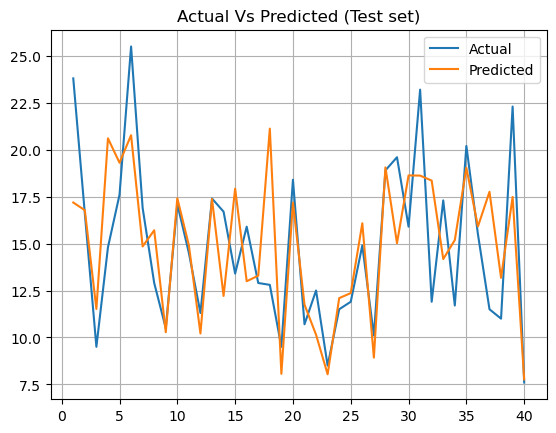

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x=np.arange(1,len(y_test)+1)

plt.plot(x,y_test,label='Actual')
plt.plot(x,y_pred,label='Predicted')
plt.title("Actual Vs Predicted (Test set)")
plt.legend(loc="best")
plt.grid(True)


In [18]:
# 